In [37]:
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
data = pd.read_csv('/content/diabetes_dataset.csv')
data.head()

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
0,69,5,28.39,130.1,77.0,5.4,130.4,44.0,50.0,90.5,107.9,0.84,0,0,0,1,0
1,32,1,26.49,116.5,72.0,4.5,87.4,54.2,129.9,113.3,81.4,1.39,0,0,0,0,0
2,89,13,25.34,101.0,82.0,4.9,112.5,56.8,177.6,84.7,107.2,0.79,0,0,0,1,0
3,78,13,29.91,146.0,104.0,5.7,50.7,39.1,117.0,108.9,110.0,0.99,0,0,0,1,1
4,38,8,24.56,103.2,74.0,4.7,102.5,29.1,145.9,84.1,92.8,0.91,0,1,0,0,0


In [39]:
x = data.drop('Outcome', axis=1).values
y = data['Outcome'].values

In [40]:
x.reshape(-1, 1)
y.reshape(-1, 1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(n_estimators=20, random_state=42)
classifier.fit(x_train, y_train)


GradientBoostingClassifier(n_estimators=20, random_state=42)

In [48]:
classifier.score(x_test, y_test)

1.0

In [49]:
y_pred = classifier.predict(x_test)

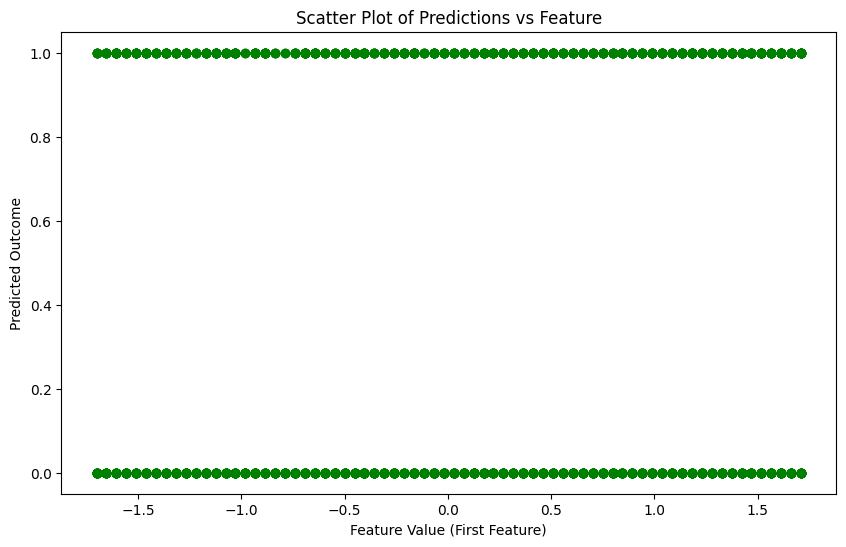

In [50]:
x_test_for_plot = x_test[:, 0]
plt.figure(figsize=(10, 6))
plt.scatter(x_test_for_plot, y_pred, color="green")
plt.xlabel("Feature Value (First Feature)")
plt.ylabel("Predicted Outcome")
plt.title("Scatter Plot of Predictions vs Feature")
plt.show()